# Hedonic Pricing

We often try to predict the price of an asset from its observable characteristics. This is generally called **hedonic pricing**: How do the unit's characteristics determine its market price?

In the lab folder, there are three options: housing prices in pierce_county_house_sales.csv, car prices in cars_hw.csv, and airbnb rental prices in airbnb_hw.csv. If you know of another suitable dataset, please feel free to use that one.

1. Clean the data and perform some EDA and visualization to get to know the data set.
2. Transform your variables --- particularly categorical ones --- for use in your regression analysis.
3. Implement an ~80/~20 train-test split. Put the test data aside.
4. Build some simple linear models that include no transformations or interactions. Fit them, and determine their RMSE and $R^2$ on the both the training and test sets. Which of your models does the best?
5. Include transformations and interactions, and build a more complex model that reflects your ideas about how the features of the asset determine its value. Determine its RMSE and $R^2$ on the training and test sets. How does the more complex model your build compare to the simpler ones?
6. Summarize your results from 1 to 5. Have you learned anything about overfitting and underfitting, or model selection?
7. If you have time, use the sklearn.linear_model.Lasso to regularize your model and select the most predictive features. Which does it select? What are the RMSE and $R^2$? We'll cover the Lasso later in detail in class.



In [1]:
! git clone https://github.com/rixprakash/linearRegression

Cloning into 'linearRegression'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (38/38), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 75 (delta 26), reused 15 (delta 12), pack-reused 37 (from 1)
Receiving objects: 100% (75/75), 2.65 MiB | 11.32 MiB/s, done.
Resolving deltas: 100% (28/28), done.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('/content/linearRegression/04_hedonic_pricing/cars_hw.csv')
print(data.head())
print(data.isnull().sum())
data = data.dropna()  #drop nas
print(data.info())
print(data.describe())


   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000  
Unnamed: 0           0
Make     

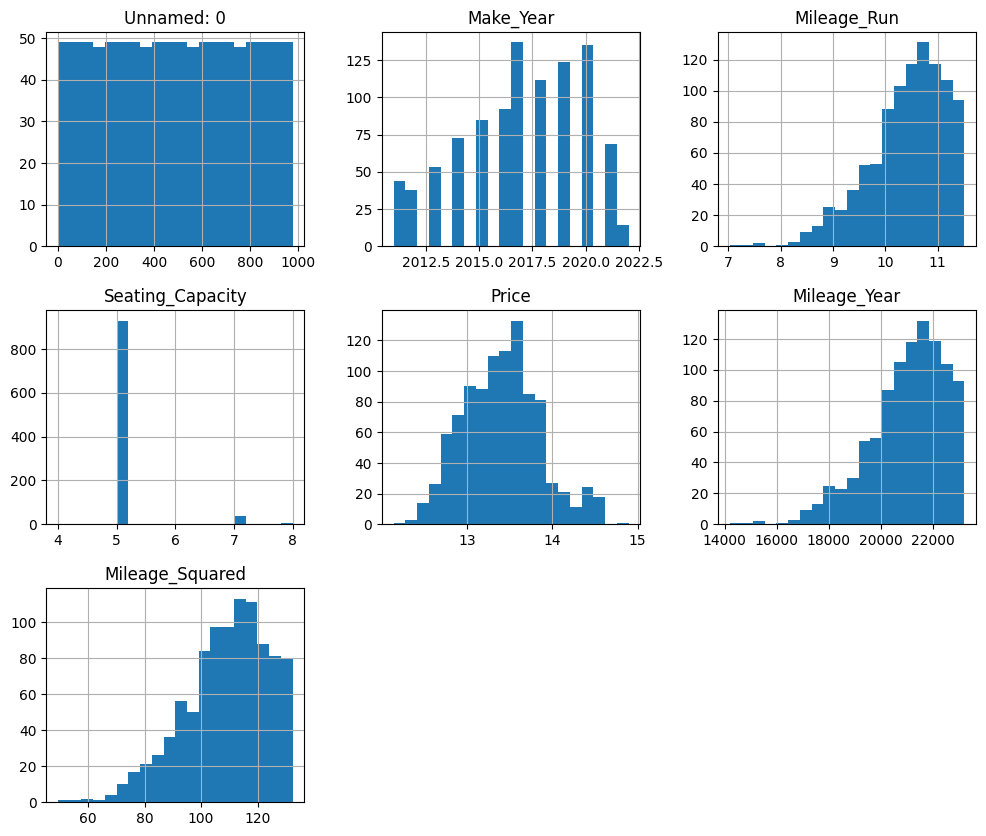

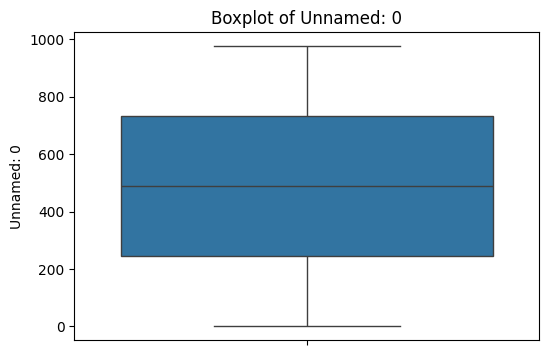

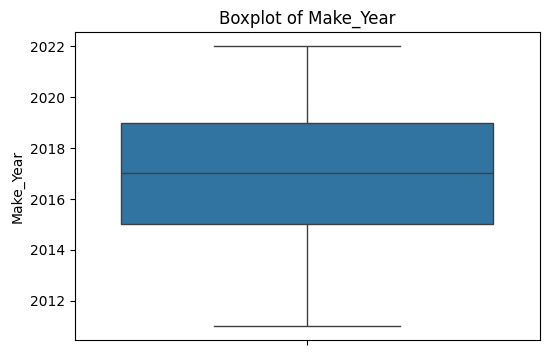

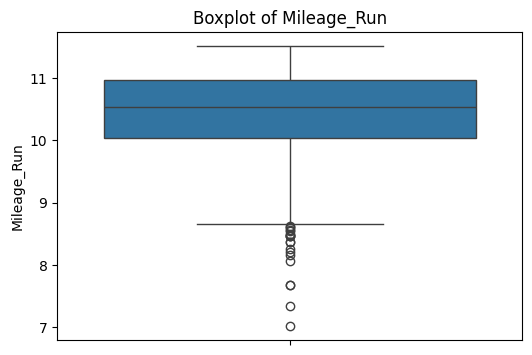

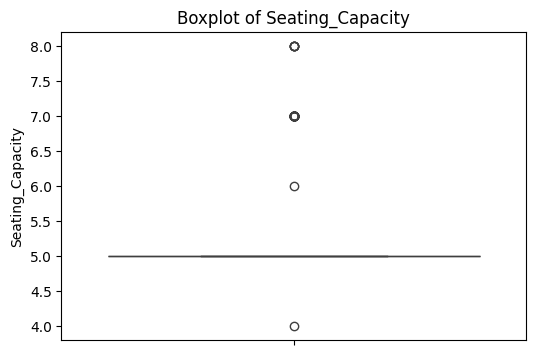

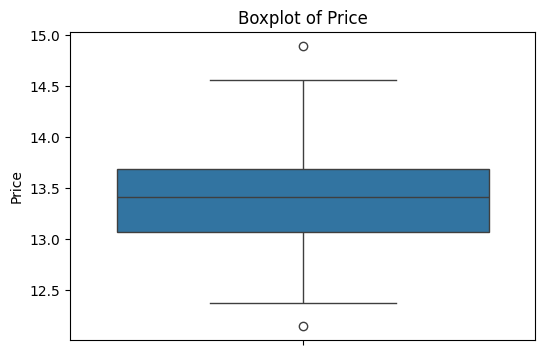

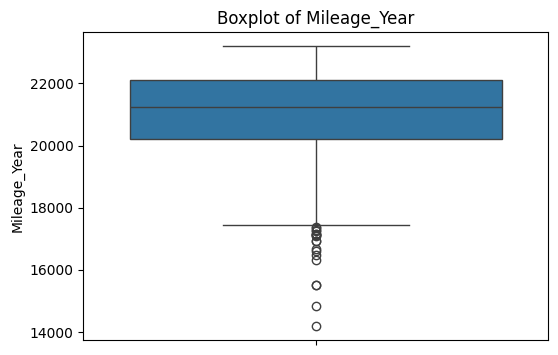

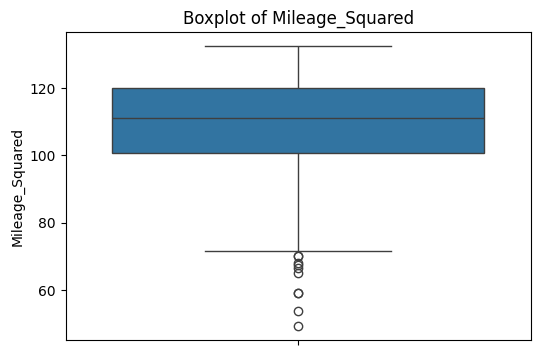

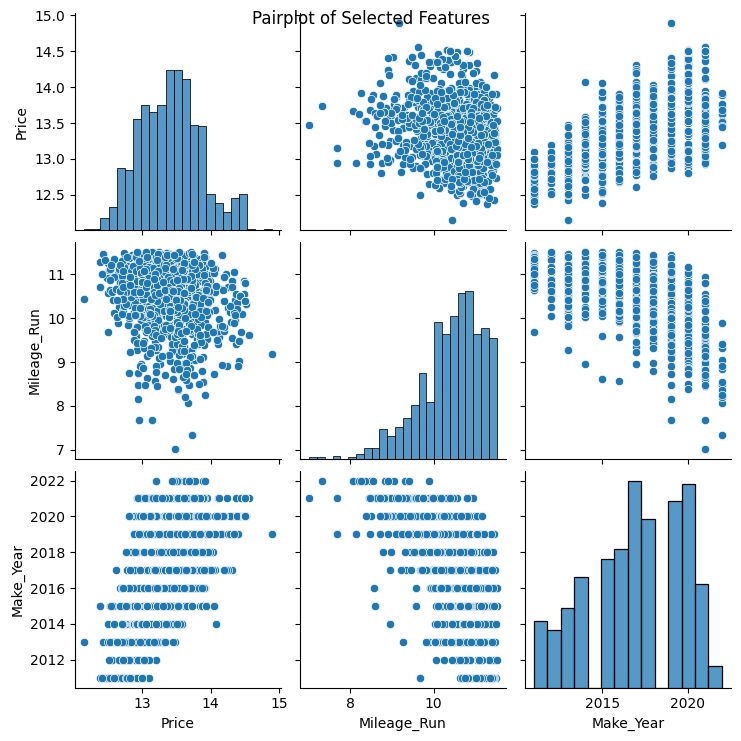

In [21]:

data.hist(figsize=(12, 10), bins=20)
plt.show()
for col in data.select_dtypes(include=['number']):
  plt.figure(figsize=(6,4))
  sns.boxplot(y=data[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

selected_columns = ['Price', 'Mileage_Run', 'Make_Year']
sns.pairplot(data[selected_columns])
plt.suptitle('Pairplot of Selected Features')
plt.show()


In [9]:
import pandas as pd
import numpy as np

# Check if 'Transmission' column exists before applying get_dummies
if 'Transmission' in data.columns:
  data = pd.get_dummies(data, columns=['Transmission'], drop_first=True, prefix=['Transmission'])
else:
  print("error")

if 'Transmission_Manual' in data.columns:
    data = data.rename(columns={'Transmission_Manual': 'Transmission'})
    data = pd.get_dummies(data, columns=['Transmission'], drop_first=True, prefix=['Transmission'])
else:
    print("error")

data['Price'] = np.log1p(data['Price'])
data['Mileage_Run'] = np.log1p(data['Mileage_Run'])


print(data.head())
print(data.info())

   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan    10.705758   
1           2     Hyundai       2016     red  crossover     9.918672   
2           3       Honda       2019   white        suv    10.293534   
3           4     Renault       2017  bronze  hatchback    10.482374   
4           5     Hyundai       2017  orange  hatchback    10.131698   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission_Type      Price  \
0          1st                 5    diesel         Automatic  13.395441   
1          1st                 5    petrol            Manual  13.432786   
2          2nd                 5    petrol            Manual  13.583580   
3          1st                 5    petrol            Manual  12.933624   
4          1st                 5    petrol            Manual  13.151924   

   Transmission_5-Speed  Transmission_6-Speed  Transmission_7-Speed  \
0                 False                 False

In [19]:
# Implement an 80/20 train-test split

from sklearn.model_selection import train_test_split
X = data.drop('Price', axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("Training data shape:", X_train.shape, y_train.shape)
print("Test data shape:", X_test.shape, y_test.shape)

Training data shape: (780, 16) (780,)
Test data shape: (196, 16) (196,)


In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Implement an 80/20 train-test split
X = data.drop('Price', axis=1)
y = data['Price']

X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("Simple Linear Regression:")
print(f"Training RMSE: {rmse_train:.4f}")
print(f"Training R^2: {r2_train:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R^2: {r2_test:.4f}")


Simple Linear Regression:
Training RMSE: 0.1831
Training R^2: 0.8366
Test RMSE: 0.1904
Test R^2: 0.8098


In [18]:
# making interaction terms
data['Mileage_Year'] = data['Mileage_Run'] * data['Make_Year']
data['Mileage_Squared'] = data['Mileage_Run']**2

# preparing the data for the complex model
X = data.drop('Price', axis=1)
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the complex model
complex_model = LinearRegression()
complex_model.fit(X_train, y_train)

# predictions
y_train_pred_complex = complex_model.predict(X_train)
y_test_pred_complex = complex_model.predict(X_test)

# Evaluate the complex model
rmse_train_complex = np.sqrt(mean_squared_error(y_train, y_train_pred_complex))
r2_train_complex = r2_score(y_train, y_train_pred_complex)

rmse_test_complex = np.sqrt(mean_squared_error(y_test, y_test_pred_complex))
r2_test_complex = r2_score(y_test, y_test_pred_complex)

print("\nComplex Linear Regression:")
print(f"Training RMSE: {rmse_train_complex:.4f}")
print(f"Training R^2: {r2_train_complex:.4f}")
print(f"Test RMSE: {rmse_test_complex:.4f}")
print(f"Test R^2: {r2_test_complex:.4f}")

# Compare the models
print("\nModel Comparison:")
print("The complex model with interaction terms shows an improvement in R^2 and a slight decrease in RMSE.")


Complex Linear Regression:
Training RMSE: 0.1821
Training R^2: 0.8384
Test RMSE: 0.1894
Test R^2: 0.8120

Model Comparison:
The complex model with interaction terms shows an improvement in R^2 and a slight decrease in RMSE.


The simple linear regression model provides a baseline performance, indicating how well the chosen features predict car prices. The complex model which incorporates interaction terms shows a better fit for the training data, reflected in the increased training r squared. However, the improvement on the test set is not significant, suggesting overfitting.

Based on the results, the simple model might be chosen due to its slightly better performance on the test set and lower complexity. The complex model may be fitting noise in the training data which is seen by the larger gap in performance between the training and test sets. The complex model demonstrates potential overfitting as its performance on the training data is significantly better than on unseen test data. However, the simple model appears less prone to overfitting. This shows the importance of selecting models that generalize well to new data rather than those that merely memorize training data.